# Keras

In [1]:
# conda install -c anaconda keras # to install keras on cpu

In [2]:
#conda uninstall -y tensorflow

In [3]:
#conda install tensorflow

In [4]:
#conda uninstall -y keras

In [5]:
#conda install -c anaconda keras

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [7]:
image_size = 32
num_channels = 3 #RGB
num_features = image_size * image_size * num_channels
num_classes = 10
num_train = 49000

## Load Cifar-10 Dataset

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Train data shape: {}'.format(x_train.shape)) 
print('Test data shape: {}'.format(x_test.shape)) 

Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


### Enumerate

In [9]:
my_list = ['apple', 'banana', 'grapes', 'pear']
for counter, value in enumerate(my_list):
    print (counter, value)

0 apple
1 banana
2 grapes
3 pear


## Data Visualization

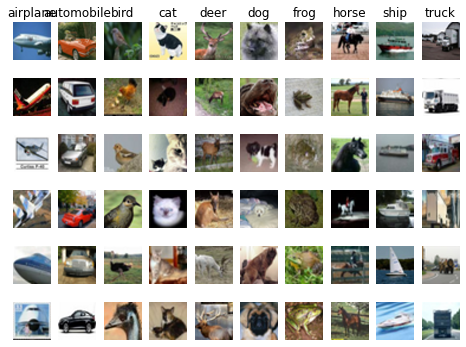

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 6

plt.figure(figsize=(8, 6))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace= False)
    for i, idxs in enumerate(idxs):
        plt.subplot(samples_per_class, num_classes, i * num_classes + cls + 1)
        plt.imshow(x_train[idxs], interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Processing

In [11]:
# convert 4D arrays to 2D arrays
x_train = x_train.reshape([-1, num_features])
x_test  =  x_test.reshape([-1, num_features])

print('Train data shape: {}'.format(x_train.shape)) 
print('Test data shape: {}'.format(x_test.shape)) 
print(y_train.shape)

Train data shape: (50000, 3072)
Test data shape: (10000, 3072)
(50000, 1)


In [12]:
# convert pixel range from [0, 255] to [0. , 1.]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mu = np.mean(x_train, axis=0)

x_train -=mu
x_train /= 255

x_test -= mu
x_test /=255

## One-hot encoding

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Linear Classifier

In [14]:
model = Sequential()
model.add(Dense(num_classes, input_shape=(num_features,), activation='softmax'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [16]:
model.compile(optimizer='sgd',  loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train[:num_train], y_train[:num_train], 
                    batch_size=512, 
                    epochs=15,
                    verbose=2,
                    validation_data=(x_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Train on 49000 samples, validate on 1000 samples
Epoch 1/15
 - 1s - loss: 2.1068 - accuracy: 0.2464 - val_loss: 2.0113 - val_accuracy: 0.3120
Epoch 2/15
 - 1s - loss: 1.9690 - accuracy: 0.3122 - val_loss: 1.9451 - val_accuracy: 0.3280
Epoch 3/15
 - 1s - loss: 1.9179 - accuracy: 0.3359 - val_loss: 1.9095 - val_accuracy: 0.3440
Epoch 4/15
 - 1s - loss: 1.8870 - accuracy: 0.3483 - val_loss: 1.8858 - val_accuracy: 0.3580
Epoch 5/15
 - 1s - loss: 1.8655 - accuracy: 0.3572 - val_loss: 1.8682 - val_accuracy: 0.3660
Epoch 6/15
 - 1s - loss: 1.8492 - accuracy: 0.3623 - val_loss: 1.8538 - val_accuracy: 0.3650
Epoch 7/15
 - 1s - loss: 1.8364 - accuracy: 0.3688 - val_loss: 1.8440 - val_accuracy: 0.3810
Epoch 8/15
 - 1s - loss: 1.8257 - accuracy: 0.3737 - val_loss: 1.8350 - val_accuracy: 0.3830
Epoch 9/15
 - 1s - loss: 1.8168 - accuracy: 0.3771 - val_loss: 1.8275 - val_accuracy: 0.3880
Epoch 10/15
 - 1s - loss: 1.8090 - accuracy: 0.3798 - val_loss: 1.8209 - val_accuracy: 0.3930
Epoch 11/15
 - 1s - 

In [18]:
keras.__version__ 

'2.3.1'

In [19]:
import keras
from keras import optimizers
from tensorflow import keras
from tensorflow.keras import optimizers
from keras.models import load_model
import keras.optimizers

In [20]:
from tensorflow.python.keras.optimizers import TFOptimizer

In [21]:
'''model.save('Linear-model.h5')'''

"model.save('Linear-model.h5')"

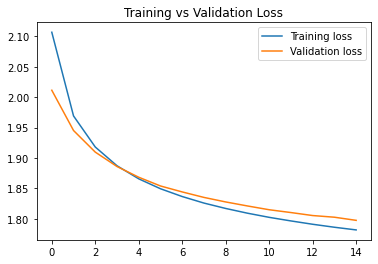

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

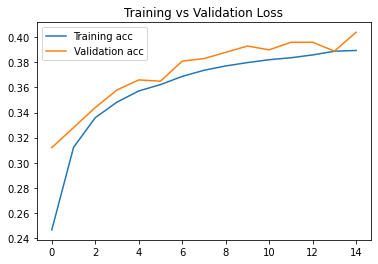

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [24]:
# Select 25 random images from test images
idx = np.random.choice(x_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model.predict_classes(x_test[idx])

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('tesy Accuracy = %.2f'% (100.0 *  np.mean(y_pred == y_true)))

tesy Accuracy = 28.00


# Multi-layer Neural Network

In [25]:
model = Sequential()

# Fist hidden layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(Activation(activation='relu'))

# Second hidden layer
model.add(Dense(units=100))
model.add(Activation(activation='relu'))

# output layer
model.add(Dense(units=num_classes, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               307300    
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [27]:
optimizer = keras.optimizers.RMSprop(lr=.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(x_train[:num_train], y_train[:num_train],
         batch_size=256, 
         epochs=15, 
         validation_data=(x_train[:num_train], y_train[:num_train]))

Train on 49000 samples, validate on 49000 samples
Epoch 1/15
49000/49000 [==============================] - 2s 47us/step - loss: nan - accuracy: 0.1005 - val_loss: nan - val_accuracy: 0.1003
Epoch 2/15
49000/49000 [==============================] - 2s 40us/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.1003
Epoch 3/15
49000/49000 [==============================] - 2s 40us/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.1003
Epoch 4/15
49000/49000 [==============================] - 2s 40us/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.1003
Epoch 5/15
49000/49000 [==============================] - 2s 40us/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.1003
Epoch 6/15
49000/49000 [==============================] - 2s 40us/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.1003
Epoch 7/15
49000/49000 [==============================] - 2s 40us/step - loss: nan - accuracy: 0.1003 - 

In [33]:
#model.save('nn.h5')

## Adding Dropout and Batch Normalization

In [34]:
from keras.layers import BatchNormalization, Dropout

In [35]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# output laye
model.add(Dense(units=num_classes, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               307300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
activation_4 (Activation)    (None, 100)              

## Training the model

In [37]:
optimizer = keras.optimizers.Adam(lr=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_train[:num_train], y_train[:num_train], 
          batch_size=256, 
         epochs=10, 
         validation_data= (x_train[:num_train], y_train[:num_train]))

Train on 49000 samples, validate on 49000 samples
Epoch 1/10
49000/49000 [==============================] - 5s 110us/step - loss: 1.8313 - accuracy: 0.3392 - val_loss: 1.6452 - val_accuracy: 0.4099
Epoch 2/10
49000/49000 [==============================] - 4s 78us/step - loss: 1.6677 - accuracy: 0.3994 - val_loss: 1.5153 - val_accuracy: 0.4602
Epoch 3/10
49000/49000 [==============================] - 4s 78us/step - loss: 1.5968 - accuracy: 0.4252 - val_loss: 1.4635 - val_accuracy: 0.4783
Epoch 4/10
49000/49000 [==============================] - 4s 76us/step - loss: 1.5404 - accuracy: 0.4477 - val_loss: 1.4102 - val_accuracy: 0.4972
Epoch 5/10
49000/49000 [==============================] - 4s 76us/step - loss: 1.5015 - accuracy: 0.4640 - val_loss: 1.3637 - val_accuracy: 0.5183
Epoch 6/10
49000/49000 [==============================] - 4s 78us/step - loss: 1.4737 - accuracy: 0.4728 - val_loss: 1.3267 - val_accuracy: 0.5317
Epoch 7/10
49000/49000 [==============================] - 4s 78us/s

# Evaluate

In [39]:
model.evaluate(x_test, y_test, batch_size=256)

10000/10000 [==============================] - 0s 21us/step


[1.3691257638931273, 0.5085999965667725]

# Convolutional Neural Network

### Converting dataset to 4D array

In [40]:
x_train = x_train.reshape((-1, image_size, image_size, num_channels))
x_test = x_test.reshape((-1, image_size, image_size, num_channels))

In [45]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [46]:
def create_cnn():
    model = Sequential()
    
    #conv Block 1
    model.add(Conv2D(64, (3,3), padding= 'same', input_shape=x_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    #conv Block 2
    model.add(Conv2D(128, (3,3), padding= 'same',activation='relu'))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    #conv Block 3
    model.add(Conv2D(256, (3,3), padding= 'same',activation='relu'))
    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Classifier
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

model = create_cnn()

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)        

In [47]:
optimizer = keras.optimizers.Adam(lr= 0.001)
model.compile(optimizer=optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x_train[:num_train], y_train[:num_train],
          batch_size=200,
          epochs=1,
          validation_data=(x_train[num_train:], y_train[num_train:]))

Train on 49000 samples, validate on 1000 samples
Epoch 1/1
49000/49000 [==============================] - 232s 5ms/step - loss: 1.7496 - accuracy: 0.3311 - val_loss: 1.3809 - val_accuracy: 0.5110


# Data Augmentation

In [51]:
model = create_cnn_cnn()

In [53]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [58]:
from keras.preprocessing.image import ImageDataGenerator

epochs = 5
batch_size = 256
data_augmentation = True

if not data_augmentation:
    model.fit(x_train[:num_train], y_train[:num_train], 
             batch_size=batch_size, 
             epochs=epochs, 
             validation_data=(x_test, y_test), 
             shuffle=True)
    
else:
    datagen = ImageDataGenerator(featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range=0, 
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False)
    
    datagen.fit(x_train[:num_train])
    
    model.fit_generator(datagen.flow(x_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(x_train[num_train:], y_train[num_train:]))

Epoch 1/5
191/191 [==============================] - 227s 1s/step - loss: 1.8178 - accuracy: 0.3076 - val_loss: 1.4275 - val_accuracy: 0.4750
Epoch 2/5
191/191 [==============================] - 233s 1s/step - loss: 1.4501 - accuracy: 0.4611 - val_loss: 1.2359 - val_accuracy: 0.5670
Epoch 3/5
191/191 [==============================] - 232s 1s/step - loss: 1.2774 - accuracy: 0.5339 - val_loss: 1.1072 - val_accuracy: 0.5860
Epoch 4/5
191/191 [==============================] - 235s 1s/step - loss: 1.1739 - accuracy: 0.5803 - val_loss: 1.0093 - val_accuracy: 0.6490
Epoch 5/5
191/191 [==============================] - 232s 1s/step - loss: 1.0841 - accuracy: 0.6148 - val_loss: 0.9576 - val_accuracy: 0.6520


In [59]:
model.evaluate(x_test, y_test, batch_size=250)

10000/10000 [==============================] - 22s 2ms/step


[0.9708377555012703, 0.6549999713897705]